# Model analys

### prepare data

In [1]:
import sys
import os
import pandas as pd

In [2]:
#!! changeing work directory
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
os.chdir(project_root)
os.getcwd()

# if path is different than ..../YachtSpeedPred then you must restart notebook (just don't run this cell multiple times)

'/mnt/c/Users/jakub/programowanie/greatProjeckts/YachtSpeedPred'

In [3]:
df = pd.read_excel('model/data/raw/database.xlsx')
clean_indf = pd.read_excel('model/data/clean/indf.xlsx').drop('Unnamed: 0', axis=1)
clean_coutdf = pd.read_excel('model/data/clean/outdf.xlsx').drop('Unnamed: 0', axis=1)
indf = df[clean_indf.columns.to_list()]
outdf = df[clean_coutdf.columns.to_list()]


In [4]:
indf

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,01/1999,11.770 m,3.636 m,2.265 m,"6,303 kg",4.8441,Cruiser/Racer,0.150%,0.487%,45.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/1983,12.250 m,3.862 m,1.338 m,"9,575 kg",8.7324,NaN,0.600%,0.487%,28.95,...,15.6,15.87,52.32,52.32,92.08,92.08,NaN,NaN,NaN,NaN
2,10/2003,13.352 m,3.968 m,2.626 m,"9,442 kg",6.0850,Cruiser/Racer,0.000%,0.487%,64.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/2012,10.160 m,3.130 m,2.161 m,"2,320 kg",2.6022,Performance,0.000%,0.390%,41.02,...,NaN,NaN,NaN,NaN,123.49,123.49,NaN,NaN,NaN,NaN
4,01/2012,10.160 m,3.130 m,2.161 m,"2,320 kg",2.6022,Performance,0.000%,0.390%,41.02,...,NaN,NaN,NaN,NaN,123.49,123.49,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,01/2022,10.966 m,3.794 m,2.230 m,"4,930 kg",4.4006,Performance,0.000%,0.065%,39.54,...,NaN,NaN,58.20,58.20,126.75,126.75,NaN,NaN,NaN,NaN
11532,01/1961,9.305 m,2.932 m,1.461 m,"4,471 kg",9.2989,Cruiser/Racer,0.510%,0.487%,25.10,...,NaN,NaN,NaN,NaN,57.57,57.57,NaN,NaN,NaN,NaN
11533,08/2000,12.010 m,3.688 m,2.379 m,"5,499 kg",4.7097,Performance,0.000%,0.487%,51.56,...,NaN,NaN,NaN,NaN,158.59,158.59,NaN,NaN,NaN,NaN
11534,01/1999,11.552 m,3.992 m,2.416 m,"5,313 kg",4.4499,Cruiser/Racer,0.110%,0.487%,47.63,...,NaN,NaN,NaN,NaN,155.44,155.44,NaN,NaN,NaN,NaN


In [5]:
outdf 

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,42.9°,40.8°,39.1°,37.8°,37.1°,36.6°,36.2°,36.6°,3.74,4.58,...,8.46,9.37,140.8°,146.9°,150.5°,155.8°,165.1°,176.8°,177.7°,176.4°
1,49.4°,48.0°,47.2°,47.2°,47.5°,48.2°,49.6°,51.7°,2.63,3.24,...,7.71,8.32,144.8°,148.7°,152.5°,156.8°,165.1°,175.0°,179.0°,179.0°
2,42.5°,40.2°,38.6°,37.8°,37.3°,37.1°,37.5°,38.5°,4.14,4.96,...,8.70,9.51,141.4°,146.5°,150.7°,155.6°,163.3°,175.4°,178.3°,178.1°
3,42.6°,40.2°,38.8°,38.7°,38.4°,38.2°,38.9°,40.6°,4.08,4.85,...,11.50,14.57,143.1°,145.8°,149.7°,149.6°,146.5°,145.7°,146.2°,150.3°
4,42.6°,40.2°,38.8°,38.7°,38.4°,38.2°,38.9°,40.6°,4.08,4.85,...,11.50,14.57,143.1°,145.8°,149.7°,149.6°,146.5°,145.7°,146.2°,150.3°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,44.1°,41.7°,40.0°,38.9°,38.4°,38.3°,39.2°,40.4°,3.53,4.33,...,8.27,10.32,143.3°,146.9°,148.0°,149.4°,148.4°,146.6°,143.1°,139.5°
11532,43.8°,42.0°,41.3°,40.6°,39.9°,39.6°,39.8°,40.9°,2.96,3.56,...,6.98,7.52,145.3°,151.0°,153.8°,159.4°,173.6°,178.1°,179.0°,179.0°
11533,42.4°,40.0°,38.2°,37.4°,37.1°,37.3°,37.4°,38.9°,3.99,4.80,...,8.90,11.45,143.0°,146.2°,149.3°,151.3°,149.4°,146.7°,143.6°,144.2°
11534,42.8°,40.6°,38.8°,37.6°,37.6°,37.5°,37.5°,38.7°,3.77,4.61,...,8.91,11.58,143.1°,146.5°,148.9°,150.6°,148.6°,146.5°,143.3°,143.5°


In [6]:
# we have to clean outdf from ° characters

import re
def doRegex(x):
            """
            removes all non-numeric characters (exept .) from the string
            """
            return re.sub(r'[^\d.]+', '', x)
        
outdf = outdf.map(lambda x: float(doRegex(str(x))))
outdf
        
        

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,42.9,40.8,39.1,37.8,37.1,36.6,36.2,36.6,3.74,4.58,...,8.46,9.37,140.8,146.9,150.5,155.8,165.1,176.8,177.7,176.4
1,49.4,48.0,47.2,47.2,47.5,48.2,49.6,51.7,2.63,3.24,...,7.71,8.32,144.8,148.7,152.5,156.8,165.1,175.0,179.0,179.0
2,42.5,40.2,38.6,37.8,37.3,37.1,37.5,38.5,4.14,4.96,...,8.70,9.51,141.4,146.5,150.7,155.6,163.3,175.4,178.3,178.1
3,42.6,40.2,38.8,38.7,38.4,38.2,38.9,40.6,4.08,4.85,...,11.50,14.57,143.1,145.8,149.7,149.6,146.5,145.7,146.2,150.3
4,42.6,40.2,38.8,38.7,38.4,38.2,38.9,40.6,4.08,4.85,...,11.50,14.57,143.1,145.8,149.7,149.6,146.5,145.7,146.2,150.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,44.1,41.7,40.0,38.9,38.4,38.3,39.2,40.4,3.53,4.33,...,8.27,10.32,143.3,146.9,148.0,149.4,148.4,146.6,143.1,139.5
11532,43.8,42.0,41.3,40.6,39.9,39.6,39.8,40.9,2.96,3.56,...,6.98,7.52,145.3,151.0,153.8,159.4,173.6,178.1,179.0,179.0
11533,42.4,40.0,38.2,37.4,37.1,37.3,37.4,38.9,3.99,4.80,...,8.90,11.45,143.0,146.2,149.3,151.3,149.4,146.7,143.6,144.2
11534,42.8,40.6,38.8,37.6,37.6,37.5,37.5,38.7,3.77,4.61,...,8.91,11.58,143.1,146.5,148.9,150.6,148.6,146.5,143.3,143.5


In [7]:
TEST_SPLIT = int(0.80 * len(indf))
X_train, y_train, X_test, y_test = indf.iloc[:TEST_SPLIT], outdf.iloc[:TEST_SPLIT], indf.iloc[TEST_SPLIT:], outdf.iloc[TEST_SPLIT:]
len(X_train), len(X_test), len(y_test), len(indf)

(9228, 2308, 2308, 11536)

In [8]:
# save notebook to predictions input folder
X_test.to_excel('model/predictions/input/input.xlsx')
X_test

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
9228,01/1985,10.900 m,3.270 m,1.946 m,"5,231 kg",5.7420,Cruiser/Racer,0.290%,0.487%,40.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9229,01/2002,11.990 m,3.898 m,2.006 m,"7,401 kg",6.5150,Cruiser/Racer,0.370%,0.487%,35.95,...,NaN,NaN,63.04,63.04,NaN,NaN,NaN,NaN,NaN,NaN
9230,01/2002,11.990 m,3.898 m,2.006 m,"7,401 kg",6.5150,Cruiser/Racer,0.370%,0.487%,35.95,...,NaN,NaN,63.04,63.04,NaN,NaN,NaN,NaN,NaN,NaN
9231,01/2002,11.990 m,3.898 m,2.006 m,"7,401 kg",6.5150,Cruiser/Racer,0.360%,0.487%,35.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9232,01/2015,9.970 m,3.440 m,1.960 m,"5,441 kg",6.7840,Cruiser/Racer,0.280%,0.292%,31.74,...,NaN,NaN,NaN,NaN,90.60,90.60,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,01/2022,10.966 m,3.794 m,2.230 m,"4,930 kg",4.4006,Performance,0.000%,0.065%,39.54,...,NaN,NaN,58.20,58.20,126.75,126.75,NaN,NaN,NaN,NaN
11532,01/1961,9.305 m,2.932 m,1.461 m,"4,471 kg",9.2989,Cruiser/Racer,0.510%,0.487%,25.10,...,NaN,NaN,NaN,NaN,57.57,57.57,NaN,NaN,NaN,NaN
11533,08/2000,12.010 m,3.688 m,2.379 m,"5,499 kg",4.7097,Performance,0.000%,0.487%,51.56,...,NaN,NaN,NaN,NaN,158.59,158.59,NaN,NaN,NaN,NaN
11534,01/1999,11.552 m,3.992 m,2.416 m,"5,313 kg",4.4499,Cruiser/Racer,0.110%,0.487%,47.63,...,NaN,NaN,NaN,NaN,155.44,155.44,NaN,NaN,NaN,NaN


### make predictions with model

In [9]:
from model import Predictexcel
predictor = Predictexcel()
predictions = predictor.make_prediction()
predictions

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,43.294521,40.998844,39.675522,38.955486,38.602856,38.477425,38.750660,40.018818,3.404191,4.117018,...,7.886168,8.790076,145.526321,152.291946,162.110809,176.203476,177.275681,178.638260,179.048569,178.579117
0,44.706547,42.416710,41.110645,40.251209,39.745872,39.574432,39.807999,40.924709,3.311312,4.030371,...,7.671787,8.193931,144.596191,146.744125,147.116241,147.053650,159.395386,175.356537,178.704483,177.805313
0,44.706547,42.416710,41.110645,40.251209,39.745872,39.574432,39.807999,40.924709,3.311312,4.030371,...,7.671787,8.193931,144.596191,146.744125,147.116241,147.053650,159.395386,175.356537,178.704483,177.805313
0,44.463547,42.255836,40.966133,40.078903,39.542648,39.341415,39.526203,40.593990,3.246454,3.998124,...,7.601948,8.075462,146.156754,151.696671,162.885376,175.976898,175.556824,176.596634,178.749466,178.301056
0,43.832508,41.650272,40.352264,39.679043,39.401604,39.368431,39.826340,41.257011,3.239457,3.947052,...,7.716965,8.826922,144.379898,147.622421,147.592377,148.530609,150.976425,173.187012,176.094666,175.716309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,43.310524,40.937401,39.256863,38.557148,38.414207,38.429699,38.823101,40.277328,3.811639,4.577138,...,8.741283,10.744437,143.324081,147.074310,148.910828,149.808502,147.729141,152.048325,146.697327,143.726242
0,43.670017,41.609921,40.710064,40.201027,39.916656,39.814278,40.233330,41.539059,2.887108,3.477268,...,6.940505,7.458617,145.109818,148.356720,151.533966,158.485382,171.578064,176.932205,178.409271,177.414352
0,42.457340,40.084438,38.561562,37.841801,37.595463,37.523285,37.684101,38.984695,3.973635,4.756629,...,8.857197,10.499404,143.028854,146.326462,149.240845,151.289398,150.029114,161.399124,150.528366,143.589691
0,42.673222,40.324841,38.789356,37.952465,37.603455,37.508785,37.705769,38.868031,3.788475,4.573838,...,8.795917,10.295682,142.628662,145.923752,148.236450,150.398468,149.539520,160.820160,155.668854,139.969131


In [10]:
y_test.shape, predictions.shape

((2308, 96), (2308, 96))

In [11]:
y_test.shape, predictions.shape

((2308, 96), (2308, 96))

### create df containing difference between model predictions and true values

In [36]:

y_test = y_test.reset_index(drop=True)
predictions = predictions.reset_index(drop=True)

differenceDf = (y_test - predictions).abs()
differenceDf


,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,0.205479,0.101156,0.175522,0.255486,0.702856,0.877425,1.450660,2.218818,0.054191,0.027018,...,0.436168,0.720076,2.273679,0.508054,1.710809,3.603476,3.375681,2.738260,1.348569,0.879117
1,0.506547,0.116710,0.110645,0.148791,0.254128,0.425568,0.592001,0.775291,0.231312,0.220371,...,0.101787,0.013931,0.396191,0.044125,0.216241,0.146350,10.995386,4.543463,1.195517,2.094687
2,0.506547,0.116710,0.110645,0.148791,0.254128,0.425568,0.592001,0.775291,0.231312,0.220371,...,0.101787,0.013931,0.396191,0.044125,0.216241,0.146350,10.995386,4.543463,1.195517,2.094687
3,0.263547,0.044164,0.033867,0.321097,0.457352,0.658585,0.873797,1.106010,0.166454,0.188124,...,0.031948,0.104538,4.043246,2.003329,15.514624,3.323102,4.243176,3.303366,1.150534,1.598944
4,0.767492,0.749728,0.447736,0.120957,0.001604,0.268431,0.426340,0.657011,0.189457,0.187052,...,0.336965,0.856922,0.179898,0.522421,0.192377,0.230609,0.876425,0.187012,0.405334,0.583691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,0.789476,0.762599,0.743137,0.342852,0.014207,0.129699,0.376899,0.122672,0.281639,0.247138,...,0.471283,0.424437,0.024081,0.174310,0.910828,0.408502,0.670859,5.448325,3.597327,4.226242
2304,0.129983,0.390079,0.589936,0.398973,0.016656,0.214278,0.433330,0.639059,0.072892,0.082732,...,0.039495,0.061383,0.190182,2.643280,2.266034,0.914618,2.021936,1.167795,0.590729,1.585648
2305,0.057340,0.084438,0.361562,0.441801,0.495463,0.223285,0.284101,0.084695,0.016365,0.043371,...,0.042803,0.950596,0.028854,0.126462,0.059155,0.010602,0.629114,14.699124,6.928366,0.610309
2306,0.126778,0.275159,0.010644,0.352465,0.003455,0.008785,0.205769,0.168031,0.018475,0.036162,...,0.114083,1.284318,0.471338,0.576248,0.663550,0.201532,0.939520,14.320160,12.368854,3.530869


In [37]:
avg = differenceDf.sum() / len(differenceDf)
avg = avg.to_numpy()
avg = avg.reshape([12, 8])
avg

array([[0.49690891, 0.56969623, 0.62378639, 0.77366021, 0.90606116,
        1.02551447, 1.25010731, 1.61051511],
       [0.11948322, 0.12053289, 0.1264499 , 0.13785326, 0.14944978,
        0.16192027, 0.19043045, 0.23496742],
       [0.16960292, 0.15241656, 0.13558361, 0.13358655, 0.14058848,
        0.15047114, 0.17402398, 0.21257643],
       [0.17444515, 0.1487471 , 0.12963479, 0.13075718, 0.14088497,
        0.15415397, 0.17873735, 0.20313631],
       [0.1777284 , 0.1501745 , 0.13823468, 0.14531927, 0.15962965,
        0.17639512, 0.21014648, 0.23804684],
       [0.1741198 , 0.1477732 , 0.146609  , 0.1684572 , 0.19282868,
        0.21869154, 0.26718222, 0.31473201],
       [0.20421342, 0.18979207, 0.17747398, 0.19231545, 0.22604885,
        0.2681711 , 0.37002216, 0.48747181],
       [0.22050217, 0.21722495, 0.20627868, 0.22389515, 0.25991761,
        0.30417039, 0.4151716 , 0.56113698],
       [0.22094729, 0.24284151, 0.23541736, 0.2579239 , 0.32574625,
        0.41131502, 0.588545

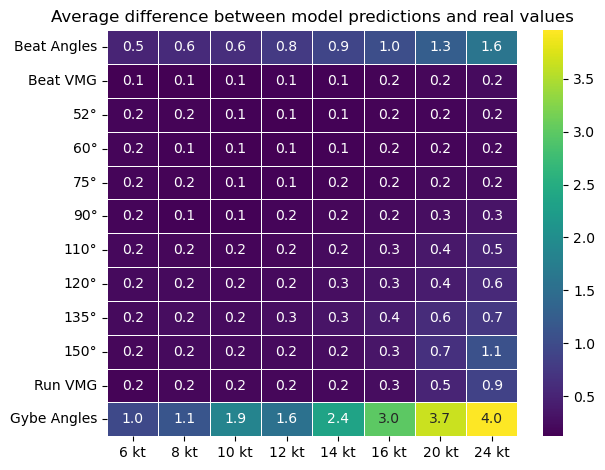

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

xtickets = [f"{x} kt" for x in list(range(6, 18, 2)) + [20, 24]]
ytickets = ["Beat Angles", "Beat VMG", "52°", "60°", "75°", "90°", "110°", "120°", "135°", "150°", "Run VMG", "Gybe Angles"] 
ax = sns.heatmap(avg, linewidth=0.5, xticklabels=xtickets, yticklabels=ytickets, cmap='viridis', annot=True, fmt=".1f")
plt.title("Average difference between model predictions and real values")
plt.tight_layout()
plt.savefig('model/plots/modelVsRelity')
plt.show()

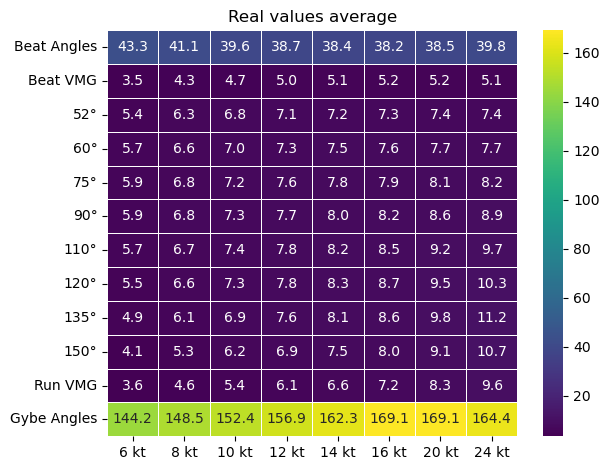

In [39]:
# let's compute average of real values
avg = y_test.sum() / len(y_test)
avg = avg.to_numpy()
avg = avg.reshape([12, 8])

#make plot
xtickets = [f"{x} kt" for x in list(range(6, 18, 2)) + [20, 24]]
ytickets = ["Beat Angles", "Beat VMG", "52°", "60°", "75°", "90°", "110°", "120°", "135°", "150°", "Run VMG", "Gybe Angles"] 
ax = sns.heatmap(avg, linewidth=0.5, xticklabels=xtickets, yticklabels=ytickets, cmap='viridis', annot=True, fmt=".1f")
plt.title("Real values average")
plt.tight_layout()
plt.savefig('model/plots/realValuesAverage.png')
plt.show()